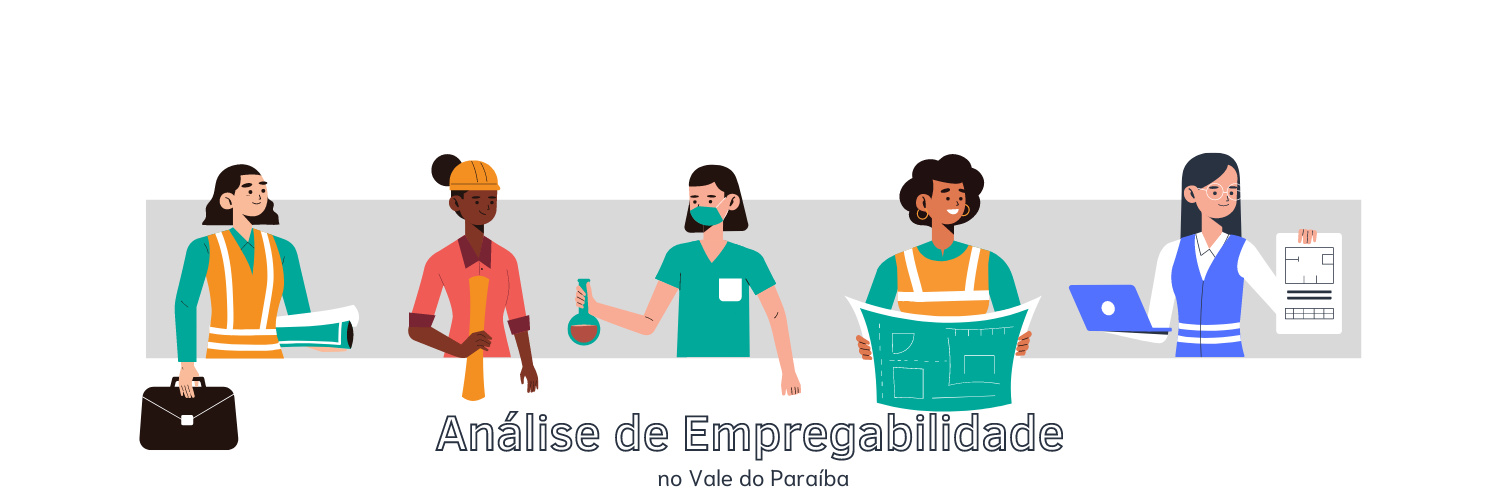

<div align="center">

<strong>Autora</strong><br>

Bruna Larissa Clemente Gomes <br>

<strong>Professor Orientador</strong><br>

Fernando Masanori Ashikaga


</div>

-----------------